# Trying Other Datasets

## Moons Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn.datasets
import matplotlib.pyplot as plt

from jax import random
from jax.experimental.stax import Relu, Sigmoid, Elu
import matplotlib.pyplot as plt

from jax_nn import create_mlp, binary_crossentropy_loss
from jax_vae import create_vae
from revise import Revise

In [3]:
rng_key = random.PRNGKey(0)

In [4]:
x_var = 0.1**2
x, y = sklearn.datasets.make_moons(300, noise=x_var**0.5, random_state=1)

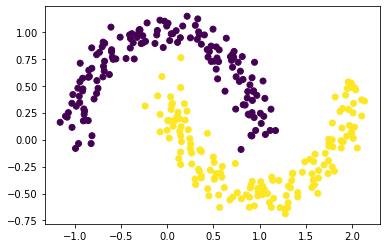

In [5]:
plt.scatter(x[:,0], x[:,1], c=y)

In [6]:
data = (x, y.reshape(-1, 1))

input_dim = 2
hidden_widths = [100]
hidden_activation = Relu
output_dim = 1
output_activation = Sigmoid

classifier = create_mlp(
    rng_key, input_dim, hidden_widths, hidden_activation, output_dim, output_activation)
classifier, history = classifier.fit(binary_crossentropy_loss, data, step_size=1e-2, max_iter=200)

In [7]:
data = x
data_vari = x_var

latent_dim = 2

enc_params = {
    'input_dim': 2,
    'hidden_widths': [64, 64],
    'activation_fn': Relu,
    'output_dim': latent_dim * 2
}
dec_params = {
    'input_dim': 2,
    'hidden_widths': [64, 64],
    'activation_fn': Relu,
    'output_dim': 2
}

vae = create_vae(rng_key, enc_params, dec_params)
vae, loss_history = vae.fit(rng_key, data, data_vari, step_size=1e-2, max_iter=500)

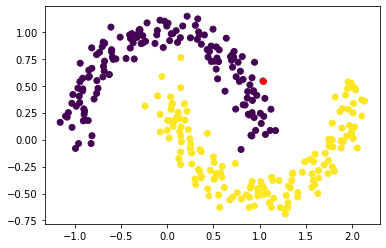

In [8]:
chosen_point = x[140,:]
plt.scatter(x[:,0], x[:,1], c=y)
_ = plt.scatter(*chosen_point, color='red')

In [9]:
revisor = Revise(classifier, vae)

In [10]:
path = revisor.shortest_path_to_target_class(chosen_point, learning_rate=1e-3, max_iter=500)

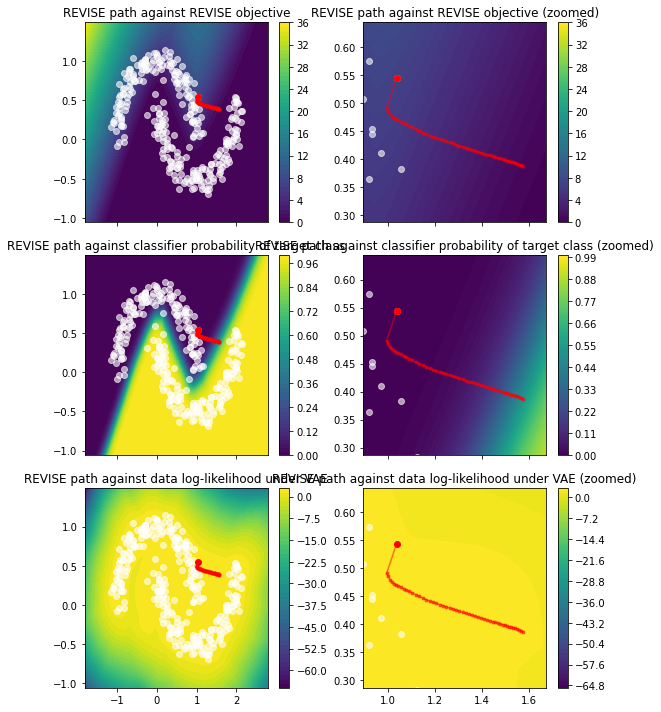

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10), sharex='col', sharey=False)
revisor.show_path(path, x, ax=axes[0][0], fig=fig)
revisor.show_path(path, x, ax=axes[0][1], fig=fig, zoom=True)
revisor.show_path(path, x, ax=axes[1][0], fig=fig, landscape='prob_target')
revisor.show_path(path, x, ax=axes[1][1], fig=fig, landscape='prob_target', zoom=True)
revisor.show_path(path, x, ax=axes[2][0], fig=fig, landscape='likelihood')
revisor.show_path(path, x, ax=axes[2][1], fig=fig, landscape='likelihood', zoom=True)
fig.tight_layout()

<AxesSubplot:title={'center':'REVISE path against REVISE objective (zoomed)'}>

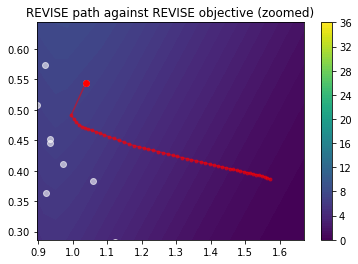

In [12]:
revisor.show_path(path, x, zoom=True)

<AxesSubplot:title={'center':'REVISE path against classifier probability of target class'}>

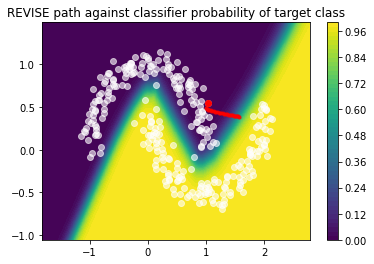

In [13]:
revisor.show_path(path, x, landscape='prob_target')

<AxesSubplot:title={'center':'REVISE path against classifier probability of target class (zoomed)'}>

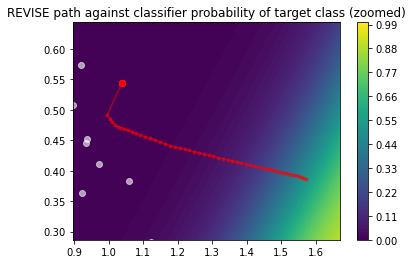

In [14]:
revisor.show_path(path, x, landscape='prob_target', zoom=True)

<AxesSubplot:title={'center':'REVISE path against data log-likelihood under VAE'}>

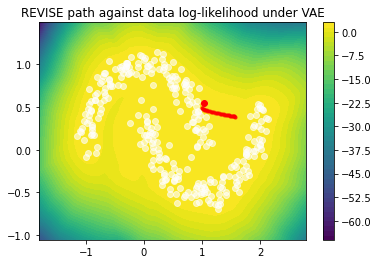

In [15]:
revisor.show_path(path, x, landscape='likelihood')

<AxesSubplot:title={'center':'REVISE path against data log-likelihood under VAE (zoomed)'}>

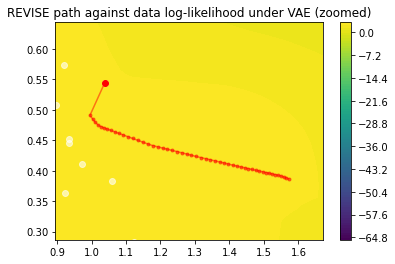

In [16]:
revisor.show_path(path, x, landscape='likelihood', zoom=True)

## Circles

In [17]:
x_var = 0.08**2
x, y = sklearn.datasets.make_circles(n_samples=300, factor=0.5,
                                      noise=x_var**0.5, random_state=1)

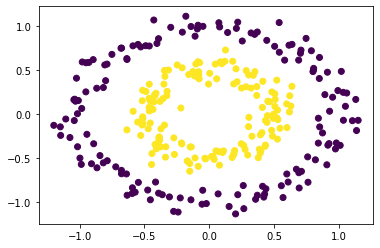

In [18]:
plt.scatter(x[:,0], x[:,1], c=y)

In [19]:
data = (x, y.reshape(-1, 1))

input_dim = 2
hidden_widths = [100]
hidden_activation = Relu
output_dim = 1
output_activation = Sigmoid

classifier = create_mlp(
    rng_key, input_dim, hidden_widths, hidden_activation, output_dim, output_activation)
classifier, history = classifier.fit(binary_crossentropy_loss, data, step_size=1e-2, max_iter=200)

In [ ]:
data = x
data_vari = x_var

latent_dim = 2

enc_params = {
    'input_dim': 2,
    'hidden_widths': [64, 64],
    'activation_fn': Relu,
    'output_dim': latent_dim * 2
}
dec_params = {
    'input_dim': 2,
    'hidden_widths': [64, 64],
    'activation_fn': Relu,
    'output_dim': 2
}

vae = create_vae(rng_key, enc_params, dec_params)
vae, loss_history = vae.fit(rng_key, data, data_vari, step_size=1e-2, max_iter=500)

In [ ]:
chosen_point = x[140,:]
plt.scatter(x[:,0], x[:,1], c=y)
_ = plt.scatter(*chosen_point, color='red')

In [ ]:
revisor = Revise(classifier, vae)

In [ ]:
path = revisor.shortest_path_to_target_class(chosen_point, learning_rate=1e-3, max_iter=500)

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10), sharex='col', sharey=False)
revisor.show_path(path, x, ax=axes[0][0], fig=fig)
revisor.show_path(path, x, ax=axes[0][1], fig=fig, zoom=True)
revisor.show_path(path, x, ax=axes[1][0], fig=fig, landscape='prob_target')
revisor.show_path(path, x, ax=axes[1][1], fig=fig, landscape='prob_target', zoom=True)
revisor.show_path(path, x, ax=axes[2][0], fig=fig, landscape='likelihood')
revisor.show_path(path, x, ax=axes[2][1], fig=fig, landscape='likelihood', zoom=True)
fig.tight_layout()